# Model Selection
Model selection is one of the important subjects in statistical modeling. We have the possibility of including as many as features, all of them would not improve the model accuracy. It is important to know which features are improving the model. There are two different approaches.

- Model selection by fitting a model and using a statistical measure such as AIC and BIC.
    - Forward stepwise seleciton
    - Backward stepwise selection

- Using a shrinkage method 












# Load file
Commonly two libraries are used to load a csv files.
- numpy function `np.loadtext` and `np.genfromtext ` 
- pandas function `pd.read_csv`

Here we prefer using pandas

In [1]:
import pandas as pd
path='data/'
filename = path+'Credit.csv'
credit = pd.read_csv(filename)

In [2]:
credit.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
credit = credit[['Balance','Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]

In [72]:
credit

,Balance,Income,Limit,Rating,Cards,Age,Education
0,333,14.891,3606,283,2,34,11
1,903,106.025,6645,483,3,82,15
2,580,104.593,7075,514,4,71,11
3,964,148.924,9504,681,3,36,11
4,331,55.882,4897,357,2,68,16
5,1151,80.180,8047,569,4,77,10
6,203,20.996,3388,259,2,37,12
7,872,71.408,7114,512,2,87,9
8,279,15.125,3300,266,5,66,13
9,1350,71.061,6819,491,3,41,19


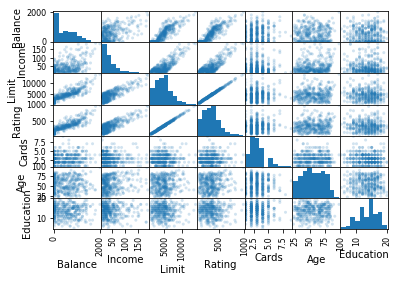

In [5]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(credit, alpha=0.2);

In [6]:
# Manual Forward stepwise selection only on 'Income' 'Limit' and 'Rating'

# model size = 1 try models with only one dimension first. Choose the best attribute.
#Go to the next step while keeping the best variable in the model.

from sklearn.linear_model import LinearRegression
y = credit['Balance'].values
X = credit[['Income']].values
lr = LinearRegression()
lr.fit(X,y)
score1 = lr.score(X,y)


y = credit['Balance'].values
X = credit[['Limit']].values
lr = LinearRegression()
lr.fit(X,y)
score2 = lr.score(X,y)

y = credit['Balance'].values
X = credit[['Rating']].values
lr = LinearRegression()
lr.fit(X,y)
score3 = lr.score(X,y)

# score3>score2>score1 so Rating enters
# model size = 2 

y = credit['Balance'].values
X = credit[['Rating', 'Income']].values
lr = LinearRegression()
lr.fit(X,y)
score31 = lr.score(X,y)

y = credit['Balance'].values
X = credit[['Rating', 'Limit']].values
lr = LinearRegression()
lr.fit(X,y)
score32 = lr.score(X,y)

# score31>score32 so Income enters as the second attribute to the model.


In [7]:
print (score31, score32)

0.8751179476994354 0.745942796101409


In [8]:
from sklearn.linear_model import Ridge
import numpy as np
y = credit['Balance'].values
X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']].values
# zero penalization gives the least squares
rr = Ridge(alpha=0, normalize=True)
rr.fit(X, y) 

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [9]:
X_pred = np.array([15, 3000, 300, 2, 34, 16]).reshape(1,6)
rr.predict(X_pred)


array([429.96915363])

In [10]:
rr = Ridge(alpha=10, normalize=True)
rr.fit(X, y) 
rr.predict(X_pred)


array([470.29152896])

# Cross-validation
Tuning a good penalization constant is like tuning finding the model size is linear regression. Let's use corss-validation.

In [11]:
from sklearn.linear_model import RidgeCV
alpha_values = np.linspace(0.0001, 0.01, num= 100)
rrcv = RidgeCV(alphas=alpha_values, normalize = True, store_cv_values = True)
rrcv.fit(X, y)


RidgeCV(alphas=array([0.0001, 0.0002, ..., 0.0099, 0.01  ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=True)

# Visualize
It is easy to track cross validation error versus the penalization parameter.

In [12]:
cv_values = np.sum(rrcv.cv_values_, axis=0)

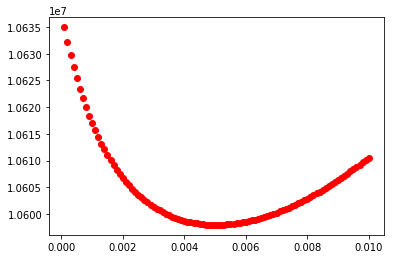

In [13]:
import matplotlib.pyplot as plt
plt.plot(alpha_values, cv_values, 'or');

In [14]:
rrcv.predict(X_pred)


array([423.76054849])

# Lasso
Fitting lasso is similar to Ridge. 



In [15]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha = 0.1, normalize = True)
lr.fit(X,y)
lr.predict(X_pred)

array([428.10551415])

# Cross validation
The penalization value needs to be estimated. Like the ridge regression we use crossvalidation to estimate it.

In [16]:
from sklearn.linear_model import LassoCV

lrcv = LassoCV(alphas = alpha_values, cv = 10, normalize = True)
lrcv.fit(X, y)


LassoCV(alphas=array([0.0001, 0.0002, ..., 0.0099, 0.01  ]), copy_X=True,
    cv=10, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=1, normalize=True, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [17]:
lrcv.alpha_

0.009

In [18]:
lrcv.predict(X_pred)

array([427.02027603])

# LARS
Least angle regression and selection is a computationally fast method for finding the solution path of coefficients for a varying penalization constant alpha

In [50]:
import matplotlib.pyplot as plt
from sklearn.linear_model import lars_path
alphas,_,coefs = lars_path(X, y, method='lasso', verbose=True)

.

In [68]:
alphas[1]

3561.1095249443874

In [69]:
coefs[:,1]

array([0.       , 0.1215262, 0.       , 0.       , 0.       , 0.       ])